In [59]:
import sys
sys.path.append('..')

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Dados**

In [61]:
train_data = pd.read_csv('../data/gp_data_train.csv', header=None).values
test_data = pd.read_csv('../data/gp_data_test.csv', header=None).values

X_train = train_data[:, 0]
y_train = train_data[:, 1]

X_test = test_data[:, 0]
y_test = test_data[:, 1]

Text(0.5, 1.0, 'Dados de treino')

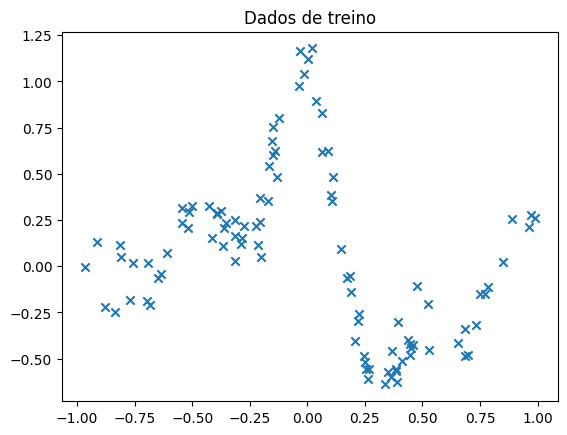

In [62]:
plt.scatter(X_train, y_train, marker='x')
plt.title('Dados de treino')

# **Métricas**

In [63]:
from sklearn.metrics import root_mean_squared_error

In [64]:
def nlpd(y_true, y_pred, y_pred_std):
    diff_squared = (y_true - y_pred) ** 2
    
    log_term = np.log(2 * np.pi * y_pred_std**2)
    
    nlpd = 0.5 * np.sum(log_term + diff_squared / (y_pred_std**2))
    
    return nlpd

In [65]:
from amaprob.models.gaussian_process_regression import GaussianProcessRegressor

# **Modelos**

Usei como hiperparâmetros os chutes iniciais, o modelo não ficou muito bom...

In [66]:
data_points = [10, 30, 50, 75, 100]

In [67]:
models = [GaussianProcessRegressor() for i in range(len(data_points))]

In [68]:
for idx, model in enumerate(models):
    model.fit(X_train[:data_points[idx]], y_train[:data_points[idx]])

# **Visualização**

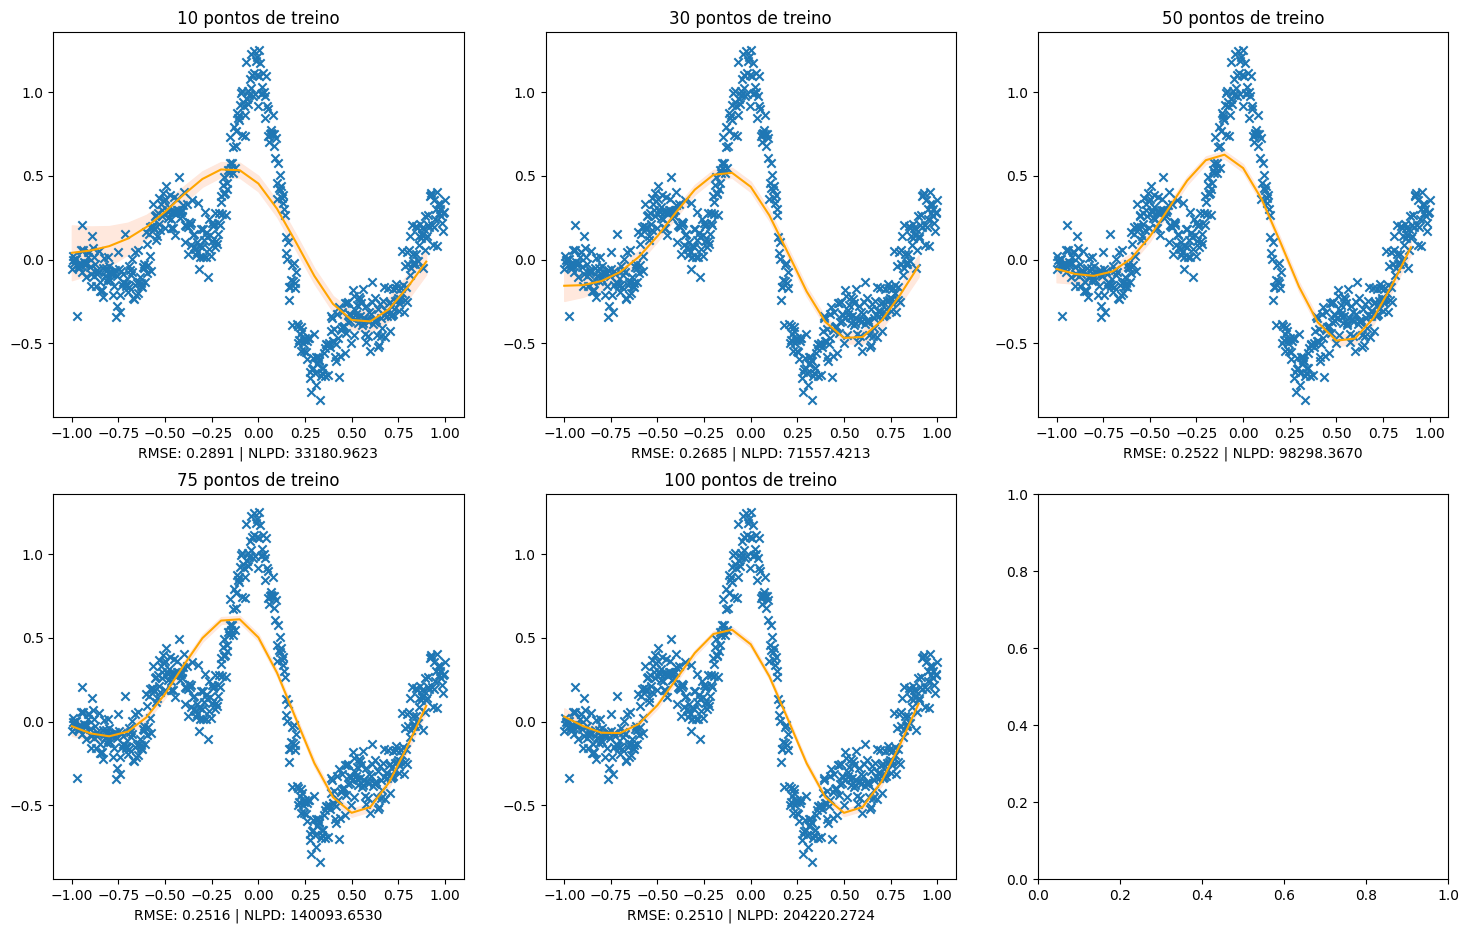

In [69]:
fig, axs = plt.subplots(2, 3, figsize=(18, 11))

subset_size = 500  # P/ debug, o .predict() demora muito com muitas instâncias

rng = np.arange(-1.0, 1.0, 0.1)
for idx in range(5):
    i = idx // 3
    j = idx % 3
    
    meanvar_rng = models[idx].predict(rng)
    y_pred_rng = meanvar_rng[0]
    std = meanvar_rng[1]
    upper = y_pred_rng + 2*std
    lower = y_pred_rng - 2*std

    meanvar = models[idx].predict(X_test[:subset_size])
    y_pred = meanvar[0]
    std = meanvar[1]

    axs[i][j].fill_between(rng, upper, lower, color='#ffe8dd')
    axs[i][j].scatter(X_test, y_test, marker='x')
    axs[i][j].plot(rng, y_pred_rng, color='orange')
    axs[i][j].set_title(f'{data_points[idx]} pontos de treino')
    axs[i][j].set_xlabel(f'RMSE: {root_mean_squared_error(y_pred, y_test[:subset_size]):.4f} | NLPD: {nlpd(y_test[:subset_size], y_pred, std):.4f}')